In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading and Exploratory Data Analysis (EDA)

## Data Loading

In [31]:
# Importing libraries

import numpy as np
import pandas as pd

In [32]:
# Load the data
df = pd.read_csv('../data/raw/water_sanitation.csv')
df.head()

,entry_id,country,source_title,excerpt,geo_location,water_source,sanitation_type,sector,gender,age_group,...,water_color,water_clarity,water_odor,recent_rain,nearby_activities,nearby_infrastructure,vegetation_near_source,waste_disposal_nearby,animal_access,water_flow_rate
0,81a69ab1-6070-4643-ab31-062dabbe355d,Haiti,Skill may certainly off sing.,Health inspectors on site found that improper ...,5.937200,River,Open Defecation,Health,Female,Youth,...,clear,clear,chemical,no,farming,waste facilities,lush,managed sites,no,slow
1,e4774c0e-38ca-48bc-a62d-56ad7dc2ebf1,Ethiopia,Cup movie than fund artist.,The latest sanitation review indicated that im...,34.615215,Borehole,Composting Toilet,Public Infrastructure,Male,Youth,...,murky,turbid,sewage,yes,farming,waste facilities,sparse,none,yes,stagnant
2,ed103eee-2e27-4be4-b6fe-59e1b095a507,Nepal,Note Congress day million everybody environmen...,"According to recent field observations, waste ...",-68.387244,Truck Delivery,Pit Latrine,Health,Female,Adult,...,green,clear,sewage,no,mining,waste facilities,dead,managed sites,yes,flowing
3,4d8e529d-08cd-428b-b4a8-e4c4cbadeb33,India,Summer today southern.,The latest sanitation review indicated that ef...,-71.814776,Rainwater,Composting Toilet,Education,Male,Elderly,...,brown,turbid,sewage,no,mining,sewage lines,dead,managed sites,yes,slow
4,8396148f-36a8-4ee9-af7f-653b8d06aa9c,Kenya,Region sea nation fast shake born.,A comprehensive report issued by the agency no...,-10.132914,Borehole,Composting Toilet,Public Infrastructure,Female,Youth,...,murky,cloudy,none,no,none,waste facilities,lush,open dumping,no,stagnant


## Data Exploration

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   entry_id                4157 non-null   object 
 1   country                 4157 non-null   object 
 2   source_title            4157 non-null   object 
 3   excerpt                 4157 non-null   object 
 4   geo_location            4157 non-null   float64
 5   water_source            4157 non-null   object 
 6   sanitation_type         4157 non-null   object 
 7   sector                  4157 non-null   object 
 8   gender                  4157 non-null   object 
 9   age_group               4157 non-null   object 
 10  income_level            4157 non-null   object 
 11  infrastructure_type     4157 non-null   object 
 12  population_density      4157 non-null   object 
 13  climate_zone            4157 non-null   object 
 14  year                    4157 non-null   

In [34]:
df.columns

Index(['entry_id', 'country', 'source_title', 'excerpt', 'geo_location',
       'water_source', 'sanitation_type', 'sector', 'gender', 'age_group',
       'income_level', 'infrastructure_type', 'population_density',
       'climate_zone', 'year', 'organization', 'source_type',
       'special_needs_group', 'severity', 'water_color', 'water_clarity',
       'water_odor', 'recent_rain', 'nearby_activities',
       'nearby_infrastructure', 'vegetation_near_source',
       'waste_disposal_nearby', 'animal_access', 'water_flow_rate'],
      dtype='object')

In [35]:
df['excerpt'][0]

'Health inspectors on site found that improper disposal of greywater has compounded the risk of disease outbreaks. Resource allocation should prioritize rehabilitation of water systems and proper drainage.'

From the above explorartion our data contains 29 columns and 4157 rows of entries.

Some of the columns include **'excerpt'** which gives an observation of the environment around a water source or water point or just a decscription of how the water looks like. 

Other columns includes '**water_odor'** which clasifies water smells into either none, chemical and sewage while **'water_color'** clasifies water color color into either clear, brown, murky or green

Most of this Columns describe how the condition of water and the sourounding environment which might affect or give an indication if the water is contaminated or not

## Data Cleaning

### Missing/Null-values

In [36]:
# Checking for missing/null values
for col in  df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col} : {df[col].isna().sum()}')

special_needs_group : 779


- From the above cell only **'special_needs_group'** column contains 779 missing / null-values

In [37]:
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
Name: count, dtype: int64

In [38]:
# Replace missing with 'none' instead of having 'None' which reads as Null-Value
df['special_needs_group'] = df['special_needs_group'].fillna('none')
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
none                779
Name: count, dtype: int64

### Duplicates

In [39]:
# Checking for duplicated entries
df.duplicated().sum()

1157

In [40]:
df = df.drop_duplicates()
print(f'Duplicated entries : {df.duplicated().sum()}')

Duplicated entries : 0


In [41]:
# df.to_csv('../data/processed/water_sanitation_clean.csv')

## Analysis

In [42]:
# Library importation
import seaborn as sns
import matplotlib.pyplot as plt

### Water Contamination Severity over Time

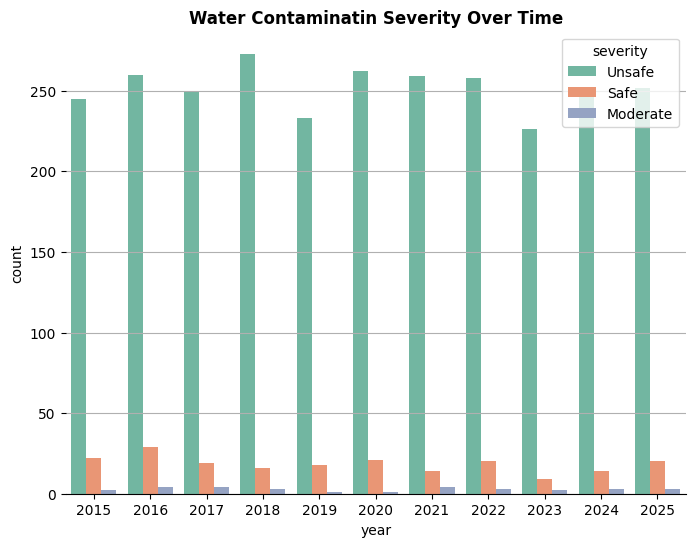

In [43]:
# Bar Plot showing contamination numbers in years

plt.figure(figsize = (8, 6))

sns.countplot(data = df, x='year', hue='severity', palette='Set2')
plt.title('Water Contaminatin Severity Over Time', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

### Water Contamination By countries

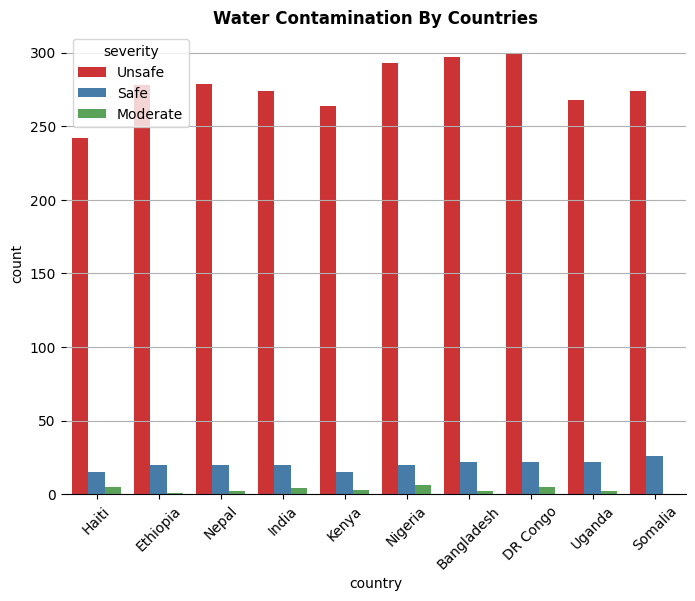

In [44]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'country', hue = 'severity', palette = 'Set1')
plt.title('Water Contamination By Countries', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

### Source Type By Organization

In [45]:
source_df = pd.crosstab(df['organization'], df['source_type'])
source_df


source_type,Academic Paper,Field Survey,Gov Report,NGO Report
organization,,,,
Red Cross,160,153,140,140
Save the Children,150,167,128,146
UNICEF,150,164,148,136
WHO,140,131,151,167
Water.org,154,169,159,147


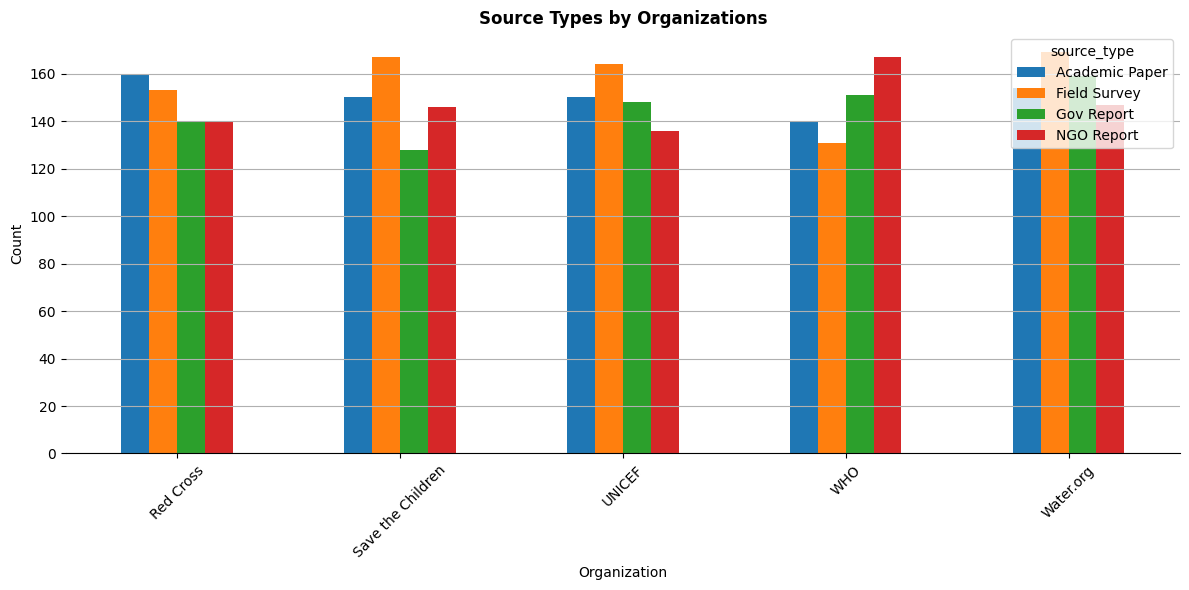

In [46]:
source_df.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Source Types by Organizations', weight='bold')
plt.xlabel('Organization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()


### Age Group Distribution

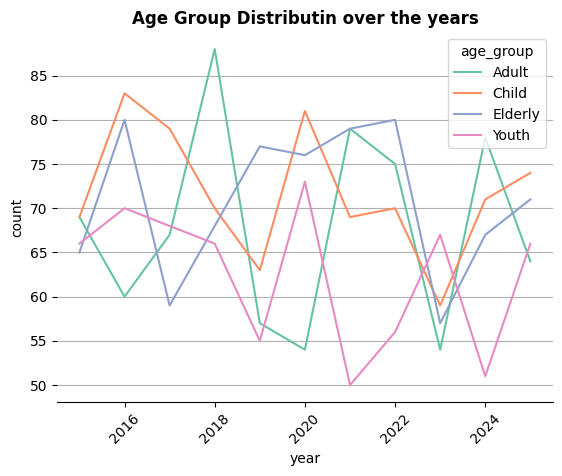

In [47]:
age_by_year = df.groupby(['year', 'age_group']).size().reset_index(name='count')

sns.lineplot(data=age_by_year, x='year', y='count', hue='age_group', palette='Set2')
plt.title('Age Group Distributin over the years', weight = 'bold')
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

# NLP Modeling

For the nlp model our target variable will be **'severity'** which classifies water as **safe**, **moderate** or **unsafe**.

We will need to create/ engineer our targe varible to by a binary clasification by making **moderate** belong to **unsafe** class since you can't have moderate or extreme contamination in water

## Preprocessing

### Cleaning

In [48]:
import nltk
print(nltk.__version__)  # Should say 3.8.1

nltk.download('punkt')
nltk.download('stopwords')


3.8.1


[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
# Library importation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#cleaning + lemmatization function
def clean_text(text):
    if pd.isnull(text):
        return ""
    
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

# Apply to DataFrame
df['clean_excerpt'] = df['excerpt'].apply(clean_text)
df['clean_excerpt'].head()


[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    health inspector site found improper disposal ...
1    latest sanitation review indicated improper di...
2    according recent field observation waste manag...
3    latest sanitation review indicated effort dist...
4    comprehensive report issued agency noted impro...
Name: clean_excerpt, dtype: object

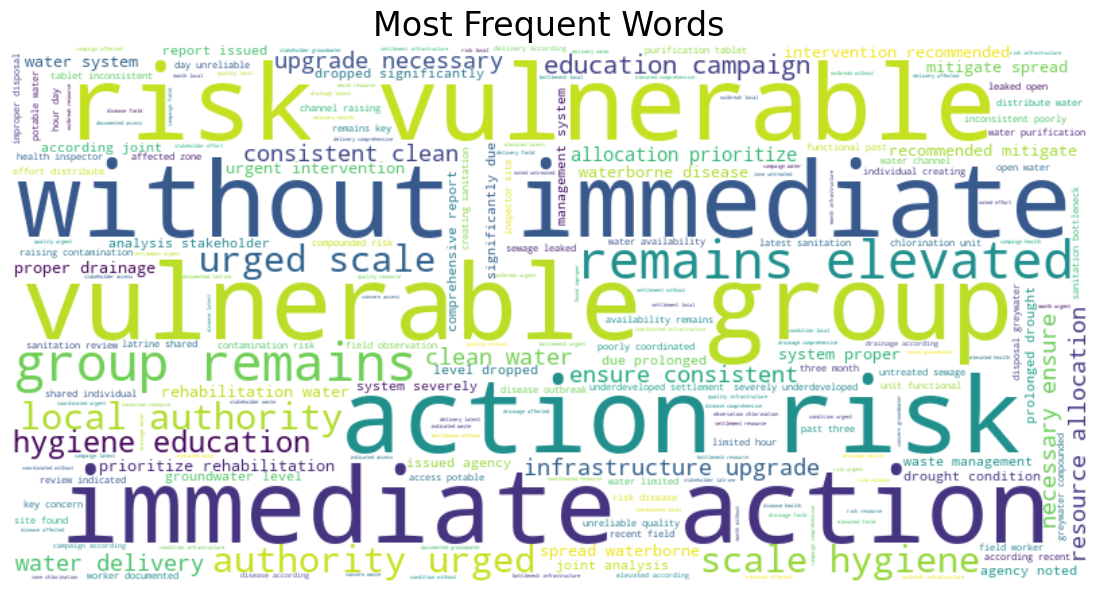

In [50]:
from collections import Counter
from wordcloud import WordCloud

all_words = ' '.join(df['clean_excerpt']).split()
word_freq = Counter(all_words)
word_freq.most_common(20)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words', fontsize=24)
plt.show()



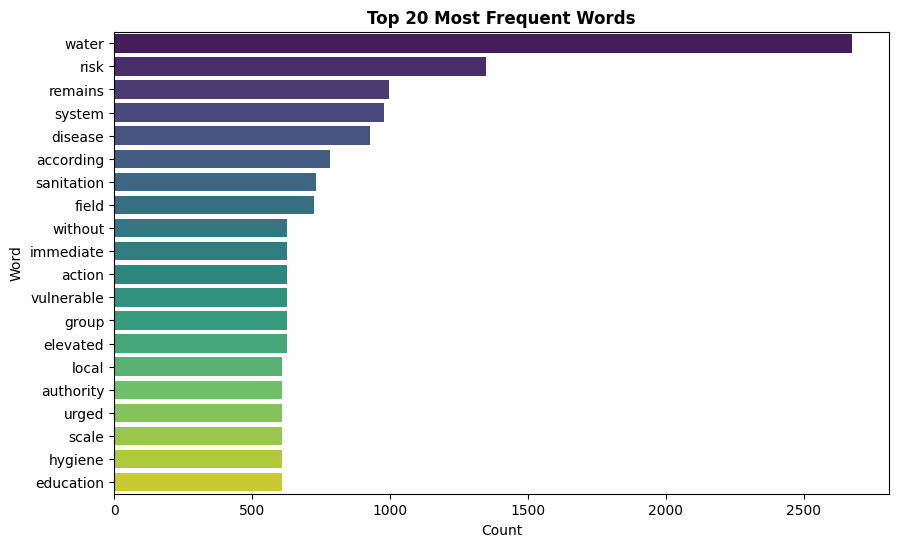

In [51]:
#TOP 20 WORDS
top_n = 20
common_words = word_freq.most_common(top_n)
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=word_df, x='count', y='word', hue = 'word', palette='viridis')
plt.title(f"Top {top_n} Most Frequent Words", weight='bold')
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

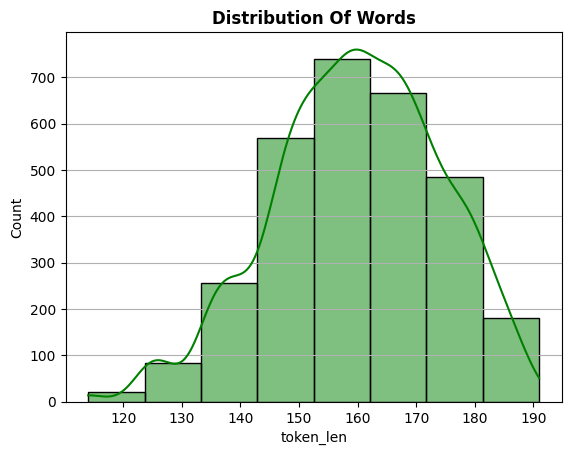

In [52]:
#word distribution Frequency
df['token_len'] = df['clean_excerpt'].apply(len)
df['token_len'].head()

#Ploting
sns.histplot(x = df['token_len'], bins = 8, kde = True, color = 'green')
plt.title('Distribution Of Words', weight = 'bold')
plt.grid(axis = 'y')
plt.show()

### Feature Engineering

For this part we are going to engineer **'severity'** column to have only a bimodal classification thats removing ***'moderate'*** class to be ***'unsafe'***

In [53]:
df['severity'].value_counts()

severity
Unsafe      2768
Safe         202
Moderate      30
Name: count, dtype: int64

In [54]:
df['severity'] = df['severity'].apply(lambda x: 'Unsafe' if x == 'Moderate' else x)
df['severity'].value_counts()


severity
Unsafe    2798
Safe       202
Name: count, dtype: int64

### Bigrams/Trigrams Analysis

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams
bigram_vec = CountVectorizer(ngram_range=(2, 2), max_features=20)
X_bigrams = bigram_vec.fit_transform(df['clean_excerpt'])

# Top 20 bigrams
bigrams = pd.DataFrame(X_bigrams.toarray(), columns=bigram_vec.get_feature_names_out())
bigrams.sum().sort_values(ascending=False)

action risk               626
group remains             626
vulnerable group          626
risk vulnerable           626
remains elevated          626
immediate action          626
without immediate         626
hygiene education         607
authority urged           607
education campaign        607
scale hygiene             607
urged scale               607
local authority           607
ensure consistent         598
infrastructure upgrade    598
necessary ensure          598
consistent clean          598
upgrade necessary         598
clean water               598
water delivery            598
dtype: int64

### TF-IDF Analysis

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vec.fit_transform(df['clean_excerpt'])

# View top TF-IDF terms
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vec.get_feature_names_out())
tfidf_df.sum().sort_values(ascending=False).head(20)


water         304.936893
risk          212.273337
system        180.785163
remains       177.953279
disease       175.124537
according     153.344168
sanitation    151.443611
field         148.279345
action        132.936685
immediate     132.936685
elevated      132.936685
without       132.936685
group         132.936685
vulnerable    132.936685
scale         131.826864
urged         131.826864
education     131.826864
local         131.826864
campaign      131.826864
authority     131.826864
dtype: float64

### Word Association / Co-occurrence

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['clean_excerpt'])
Xc = (X.T @ X)

# Convert to dataframe
co_occurrence_df = pd.DataFrame(data=Xc.toarray(), index=cv.get_feature_names_out(), columns=cv.get_feature_names_out())

# View top associations for a word
co_occurrence_df['water'].sort_values(ascending=False).head(10)


water             4107
system            1090
risk              1044
remains            972
necessary          893
ensure             893
upgrade            893
infrastructure     893
delivery           893
clean              893
Name: water, dtype: int64

## Modeling